## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
data = pd.read_csv('QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
data.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [ ]:
data.tail()

,m,TagName,Unnamed: 2
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
data.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
data.count()

m             1991
TagName       1991
Unnamed: 2    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
data.groupby('TagName').sum().sort_values('Unnamed: 2', ascending=False)


,Unnamed: 2
TagName,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
sorted_data = data.groupby('TagName').count().sort_values('m', ascending=False)
sorted_data.head()

,m,Unnamed: 2
TagName,,
c#,145,145
assembly,144,144
c,144,144
c++,144,144
delphi,144,144


In [ ]:
sorted_data.tail()

,m,Unnamed: 2
TagName,,
python,144,144
ruby,144,144
r,142,142
swift,135,135
go,129,129


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
# Convert entire "m" column to pandas timestamp:

In [ ]:
data.m = pd.to_datetime(data.m)
data.head()

,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [ ]:
reshaped_df = data.pivot(index='m', columns='TagName', values='Unnamed: 2')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df.shape

(145, 14)

In [ ]:
print(' '.join([column_name for column_name in reshaped_df.columns]))

assembly c c# c++ delphi go java javascript perl php python r ruby swift


In [ ]:
reshaped_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
for column in reshaped_df.columns:
  print(f"{column} entries: {int(reshaped_df[column].sum())}")

assembly entries: 34852
c entries: 336042
c# entries: 1423530
c++ entries: 684210
delphi entries: 46212
go entries: 47499
java entries: 1696403
javascript entries: 2056510
perl entries: 65286
php entries: 1361988
python entries: 1496210
r entries: 356799
ruby entries: 214582
swift entries: 273055


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

**Styling the Chart:**

Let's look at a couple of methods that will help us style our chart:

.figure() - allows us to resize our chart

.xticks() - configures our x-axis

.yticks() - configures our y-axis

.xlabel() - add text to the x-axis

.ylabel() - add text to the y-axis

.ylim() - allows us to set a lower and upper bound

plt.legend() - allows us to add a legend to the chart

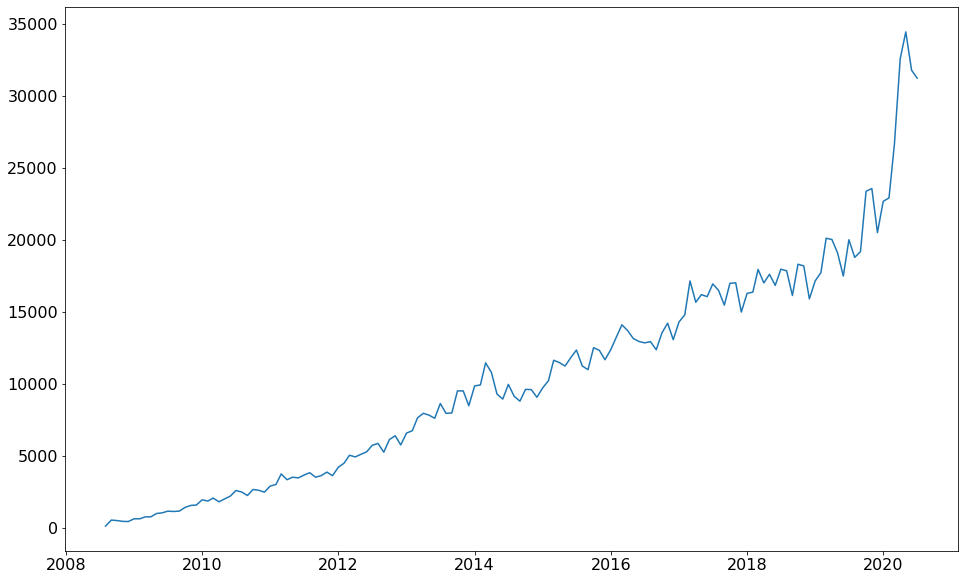

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 
plt.plot(reshaped_df.index, reshaped_df['python'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

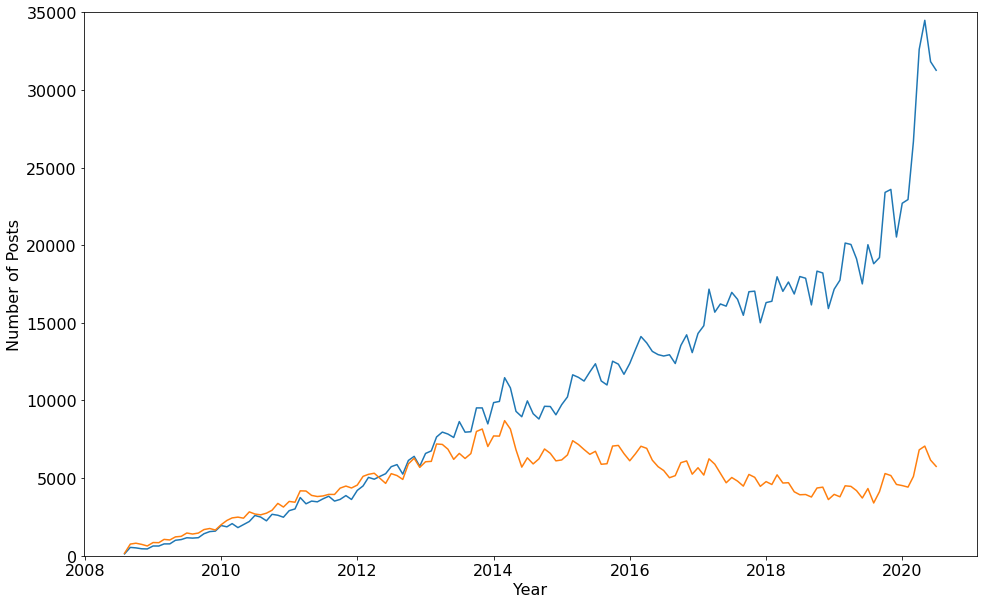

In [ ]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['python'])
plt.plot(reshaped_df.index, reshaped_df['c++'])

**Chart All Languages on 1 Chart:**

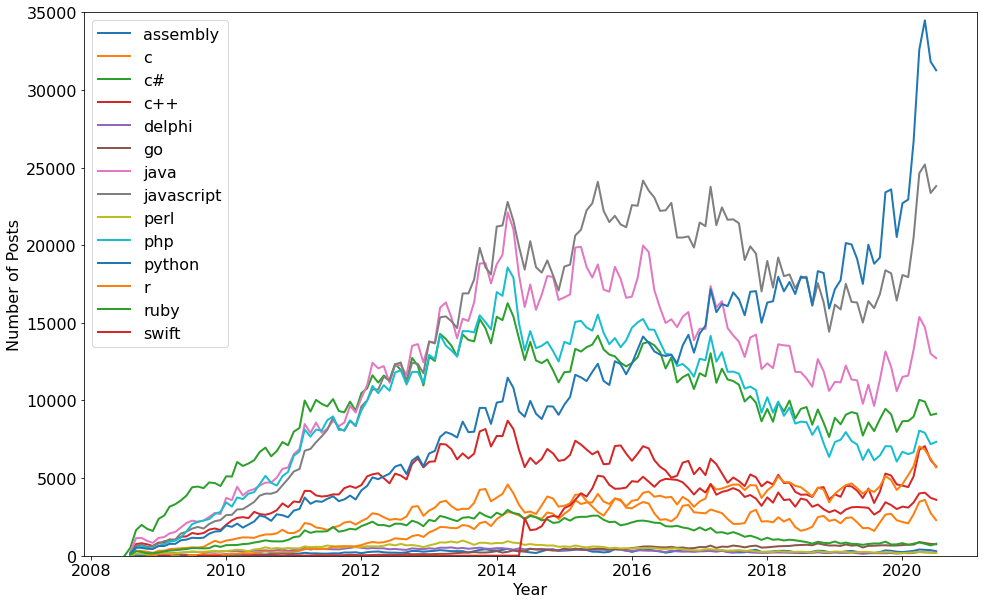

In [ ]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], 
          linewidth=2, label=reshaped_df[column].name)

plt.legend(fontsize=16) 



# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [ ]:
roll_df = reshaped_df.rolling(window=6).mean()

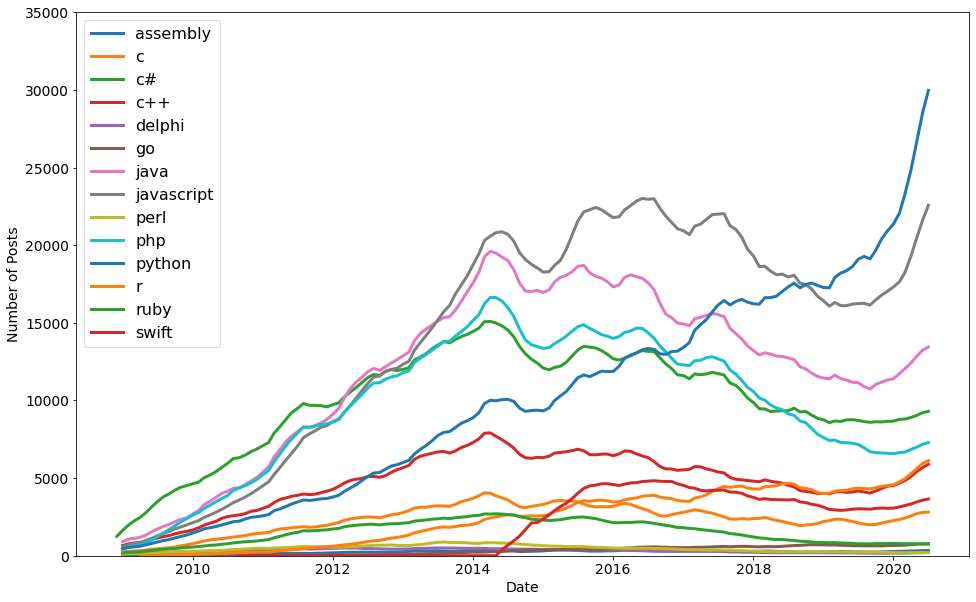

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

**Learning Points & Summary:**

used .groupby() to explore the number of posts and entries per programming language

converted strings to Datetime objects with to_datetime() for easier plotting

reshaped our DataFrame by converting categories to columns using .pivot()

used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

created (multiple) line charts using .plot() with a for-loop

styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

added a legend to tell apart which line is which by colour

smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.